# Stenosis Project - Coronary Artery Stenosis or Coronary Artery Disease 

## Import Libraries

In [11]:
import os
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.image as mpimg
import splitfolders
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.models import Sequential
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
import shutil
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from IPython.display import SVG
from scipy import ndimage
import pathlib as Path

## Initializing Data Paths

In [13]:
input_data_path =r'C:/Users/conm/Desktop/Stenosis-Project/Stenosis detection/input'

train_path = r'C:\Users\conm\Desktop\Stenosis-Project\output\train\stenosis'

train_path1 = r'C:\Users\conm\Desktop\Stenosis-Project\train_images'

test_path = r'C:\Users\conm\Desktop\Stenosis-Project\test_images'

val_path = r'C:\Users\conm\Desktop\Stenosis-Project\output\val\stenosis'

## Test and Train Labels

In [12]:
test_labels_csv = pd.read_csv('test_labels.csv')
test_labels_csv

,filename,width,height,class,xmin,ymin,xmax,ymax
0,14_029_7_0058.bmp,800,800,Stenosis,288,369,328,398
1,14_024_1_0052.bmp,800,800,Stenosis,166,160,202,202
2,14_095_2_0075.bmp,800,800,Stenosis,461,337,492,379
3,14_075_6_0035.bmp,512,512,Stenosis,128,136,189,158
4,14_081_7_0026.bmp,800,800,Stenosis,323,177,351,230
...,...,...,...,...,...,...,...,...
828,14_066_8_0028.bmp,800,800,Stenosis,125,175,161,216
829,14_048_1_0057.bmp,1000,1000,Stenosis,264,427,306,458
830,14_051_2_0051.bmp,512,512,Stenosis,82,297,110,344
831,14_051_2_0025.bmp,512,512,Stenosis,77,248,102,284


In [15]:
train_labels_csv = pd.read_csv('train_labels.csv')
train_labels_csv

,filename,width,height,class,xmin,ymin,xmax,ymax
0,14_024_2_0042.bmp,800,800,Stenosis,235,156,282,192
1,14_031_4_0031.bmp,800,800,Stenosis,419,319,446,349
2,14_046_5_0066.bmp,1000,1000,Stenosis,679,307,699,336
3,14_010_6_0035.bmp,512,512,Stenosis,94,244,126,286
4,14_014_1_0015.bmp,512,512,Stenosis,163,118,203,151
...,...,...,...,...,...,...,...,...
6737,14_066_7_0059.bmp,800,800,Stenosis,229,100,254,160
6738,14_088_8_0077.bmp,800,800,Stenosis,512,319,576,347
6739,14_095_7_0045.bmp,800,800,Stenosis,199,218,229,273
6740,14_051_6_0026.bmp,512,512,Stenosis,258,181,277,216


In [14]:
val_labels_csv = pd.read_csv('val_labels.csv')
val_labels_csv

,filename,width,height,class,xmin,ymin,xmax,ymax
0,14_029_5_0059.bmp,800,800,Stenosis,192,423,237,459
1,14_006_1_0138.bmp,800,800,Stenosis,471,438,560,575
2,14_087_1_0090.bmp,800,800,Stenosis,256,250,335,300
3,14_021_37_0019.bmp,512,512,Stenosis,187,408,239,431
4,14_057_3_0061.bmp,1000,1000,Stenosis,389,117,443,174
...,...,...,...,...,...,...,...,...
745,14_029_1_0068.bmp,800,800,Stenosis,297,265,356,310
746,14_095_2_0035.bmp,800,800,Stenosis,435,375,473,416
747,14_095_1_0080.bmp,800,800,Stenosis,501,498,546,529
748,14_048_3_0074.bmp,1000,1000,Stenosis,458,181,479,199


In [67]:
# val_files = []
# labels = []
# img_list = os.listdir(val_path)
# for j in range(len(filenames)):
#         if filenames[j] in img_list:
#             # Add the matching filename with the correct label to the list
#             val_files.append(train_labels_csv['filename'])


In [ ]:
train_images = []
train_targets = []
train_labels = []
classes = ['Stenosis']

for index, row in train_labels_csv.iterrows():
    
    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row
    
    train_image_fullpath = os.path.join(train_path1, filename)
    train_img = keras.preprocessing.image.load_img(train_image_fullpath, target_size=(height, width))
    train_img_arr = keras.preprocessing.image.img_to_array(train_img)
    
    xmin = xmin / width
    ymin = ymin / height
    xmax = xmax / width
    ymax = ymax / height
    # xmin = round(xmin/ width, 2)
    # ymin = round(ymin/ height, 2)
    # xmax = round(xmax/ width, 2)
    # ymax = round(ymax/ height, 2)
    
    train_images.append(train_img_arr)
    train_targets.append((xmin, ymin, xmax, ymax))
    train_labels.append(class_name)

In [ ]:
val_images = []
val_targets = []
val_labels = []
classes = ['Stenosis']

for index, row in val_files.iterrows():
    
    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row
    
    train_image_fullpath = os.path.join(train_path1, filename)
    train_img = keras.preprocessing.image.load_img(train_image_fullpath, target_size=(height, width))
    train_img_arr = keras.preprocessing.image.img_to_array(train_img)
    
    # Normalise the xmin, ymin, xmax, ymax values
    xmin = xmin / width
    ymin = ymin / height
    xmax = xmax / width
    ymax = ymax / height
    # xmin = round(xmin/ width, 2)
    # ymin = round(ymin/ height, 2)
    # xmax = round(xmax/ width, 2)
    # ymax = round(ymax/ height, 2)
    
    val_images.append(train_img_arr)
    val_targets.append((xmin, ymin, xmax, ymax))
    val_labels.append(class_name)

In [10]:
train_targets[2]

(0.679, 0.307, 0.699, 0.336)

## Normalise Bounding Box dimensions for test and train images

In [ ]:
# Extract xmin, ymin, xmax and ymax from train labels and stroe them in a list
train_label_dimensions = []
for i in range(len(train_labels)):
    train_label_dimensions.append([train_labels.iloc[i]['xmin'], train_labels.iloc[i]['ymin'], train_labels.iloc[i]['xmax'], train_labels.iloc[i]['ymax']])

# Scale the dimensions of the train labels
train_label_dimensions_scaled = []
for i in range(len(train_label_dimensions)):
    train_label_dimensions_scaled.append([train_label_dimensions[i][0]/1000, train_label_dimensions[i][1]/1000, train_label_dimensions[i][2]/1000, train_label_dimensions[i][3]/1000])
train_label_dimensions_scaled

In [ ]:
# Extract xmin, ymin, xmax and ymax from test labels and store them in a list
test_label_dimensions = []
for i in range(len(test_labels)):
    test_label_dimensions.append([test_labels.iloc[i]['xmin'], test_labels.iloc[i]['ymin'], test_labels.iloc[i]['xmax'], test_labels.iloc[i]['ymax']])

# Scale the dimensions of the test labels
test_label_dimensions_scaled = []
for i in range(len(test_label_dimensions)):
    test_label_dimensions_scaled.append([test_label_dimensions[i][0]/1000, test_label_dimensions[i][1]/1000, test_label_dimensions[i][2]/1000, test_label_dimensions[i][3]/1000])
test_label_dimensions_scaled

In [40]:
# Last element of the list is the class name
len(train_label_dimensions_scaled)

7493

## Extract image filenames

In [11]:
# # Extract the image names from the train_labels.csv file and store them in a list
filenames = []
for i in range(len(train_labels_csv)):
    filenames.append(train_labels_csv.iloc[i]['filename'])
len(filenames)

7493

## Load Training Data

In [9]:
training_data = []
for img in os.listdir(train_path):
    pic = cv2.imread(os.path.join(train_path, img))
    training_data.append(pic)

In [10]:
training_data[0].shape

(512, 512, 3)

In [19]:
len(training_data)

5993

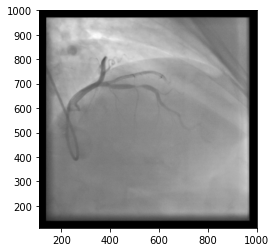

In [18]:
plt.imshow(training_data[0])

In [195]:
# training_labels = []
# remain_labels = []
# training_filenames = []
# img_list = os.listdir(train_path)
# for j in range(len(filenames)):
#         if filenames[j] in img_list:
#             training_labels.append(label_dimensions_scaled[j])
#             training_filenames.append(filenames[j])
#         else:
#             remain_labels.append(filenames[j])

In [180]:
# test123 = []
# for j in range(len(filenames)):
#         if filenames[j] not in img_list:
#             test123.append(filenames[j])

In [181]:
# test_labels = []
# img_list1 = os.listdir(test_path)
# for j in range(len(filenames)):
#         if filenames[j] in img_list1:
#             test_labels.append(label_dimensions_scaled[j])

In [8]:
def common(lst1, lst2): 
    return list(set(lst1) & set(lst2))
val_common_names = []
val_common_names=common(train_labels_csv['filename'], img_list)
print(val_common_names)

['14_080_2_0087.bmp', '14_039_4_0077.bmp', '14_031_3_0055.bmp', '14_070_5_0048.bmp', '14_053_5_0041.bmp', '14_018_8_0033.bmp', '14_066_7_0039.bmp', '14_028_3_0068.bmp', '14_083_1_0048.bmp', '14_085_4_0030.bmp', '14_064_3_0031.bmp', '14_029_7_0059.bmp', '14_021_37_0031.bmp', '14_006_1_0086.bmp', '14_021_31_0031.bmp', '14_019_5_0033.bmp', '14_016_1_0034.bmp', '14_042_3_0058.bmp', '14_022_7_0030.bmp', '14_083_1_0060.bmp', '14_058_3_0060.bmp', '14_087_2_0074.bmp', '14_087_1_0076.bmp', '14_007_8_0044.bmp', '14_096_4_0046.bmp', '14_022_6_0063.bmp', '14_039_2_0036.bmp', '14_057_2_0073.bmp', '14_021_35_0024.bmp', '14_039_5_0046.bmp', '14_055_8_0008.bmp', '14_064_3_0036.bmp', '14_085_4_0045.bmp', '14_023_3_0052.bmp', '14_021_6_0059.bmp', '14_022_6_0071.bmp', '14_068_2_0030.bmp', '14_021_37_0043.bmp', '14_039_4_0021.bmp', '14_064_2_0069.bmp', '14_024_4_0052.bmp', '14_029_6_0079.bmp', '14_039_4_0052.bmp', '14_088_6_0044.bmp', '14_087_3_0040.bmp', '14_075_3_0028.bmp', '14_069_1_0089.bmp', '14_084_

In [9]:
# Print the val_common_names list to a csv file
with open('val_common_names.csv', 'w') as f:
    for item in val_common_names:
        f.write("%s\n" % item)
        

In [10]:
len(val_common_names)

750

## Load Test Data

In [22]:
test_data = []
for img in os.listdir(test_path):
    pic = cv2.imread(os.path.join(test_path,img))
    test_data.append(pic)

In [25]:
len(test_data)

833

## Load Validation Data

In [23]:
val_data = []
for img in os.listdir(val_path):
    pic = cv2.imread(os.path.join(val_path,img))
    val_data.append(pic)

In [24]:
len(val_data)

750

In [24]:
# # Load the val data as numpy array
# val_data = []
# for i in range(len(filenames)):
#     imagePath2 = os.path.sep.join([r'C:\Users\conm\Desktop\Stenosis-Project\output\val\stenosis', f'{filenames[i]}'])
#     image2 = cv2.imread(imagePath2)
#     val_data.append(image2)

In [75]:
# # Create numpty arrays for labels and for the dimensions of the labels
# label_dimensions_scaled = np.array(label_dimensions_scaled)
# test_labels = np.array(labels)
# val_labels = np.array(labels)
# label_dimensions_scaled.shape

(8327, 4)

In [67]:
train_data_scaled = []
for i in range(training_data):
    train_data_scaled.append(cv2.resize(i, (224, 224)))

In [92]:
train_X = preprocess_image_input(train_data)
valid_X = preprocess_image_input(val_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8327,) + inhomogeneous part.

## Visualize Data

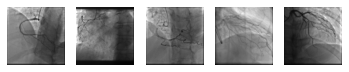

In [31]:
# Visualize five images in the train data
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_data[i])
    plt.axis('off')
    # plt.title(filenames[i])
plt.show()
# plt.imshow(train_data[0:5])

## Split Dataset

Image Augmentation

In [34]:
# Rotation of images to 180 degrees through the use of a list comprehension.
rotated_train_img = np.array([ndimage.rotate(
    train_rotate_imgs, angle=180) for train_rotate_imgs in output_train_data_path])
rotated_test_img = np.array([ndimage.rotate(
    test_rotate_imgs, angle=180) for test_rotate_imgs in normalized_test_img])
plt.imshow(rotated_train_img[0])

ValueError: input array should be at least 2D

## Training Model

In [ ]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)
# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid")(bboxHead)
# construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bboxHead)

2022-07-11 20:40:09.129267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nevillemthw/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-11 20:40:09.129809: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 20:40:09.130780: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Neville-PC): /proc/driver/nvidia/version does not exist
2022-07-11 20:40:09.133193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(lr='le-4')
model.compile(loss="mse", optimizer=opt)
print(model.summary())
# train the network for bounding box regression
print("[INFO] training bounding box regressor...")
H = model.fit(
	trainImages, trainTargets,
	validation_data=(testImages, testTargets),
	batch_size=32,
	epochs=25,
	verbose=1)